Aryan Patel ABI Project 

In [235]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.preprocessing
import sklearn.pipeline


Reading in the data

In [236]:
training_data = pd.read_csv('/Users/aryanpatel/abiprojecttrain.csv')

test_data = pd.read_csv('/Users/aryanpatel/abiprojecttest.csv')



training_data.head()



,SalePrice,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,163990,65,8461,Pave,Reg,2005,728,728,Y,728,...,2,1,3,1,8,1,2005,2,390,0
1,412500,110,13688,Pave,IR1,2003,556,1572,Y,1572,...,2,1,3,1,10,2,2003,3,726,400
2,126000,60,8160,Pave,Reg,1940,444,756,N,756,...,1,1,3,1,7,0,1940,1,240,0
3,280000,109,14154,Pave,Reg,2006,1063,1063,Y,1071,...,2,1,3,1,9,1,2006,3,947,192
4,105000,51,6120,Pave,Reg,1931,506,715,Y,875,...,1,0,2,1,5,0,1931,1,180,48


In [237]:
trainview = training_data.shape
testview = test_data.shape


print(trainview,testview)

(901, 24) (226, 24)


In [238]:
#checking if null values 
navalues = training_data.isna().sum()
print(navalues)


SalePrice       0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
YearBuilt       0
BsmtUnfSF       0
TotalBsmtSF     0
CentralAir      0
X1stFlrSF       0
X2ndFlrSF       0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
dtype: int64


In [239]:
for i, (col_name, dtype) in enumerate(training_data.dtypes.items()):
    print(f"Column {i}: {col_name} - {dtype}")


Column 0: SalePrice - int64
Column 1: LotFrontage - int64
Column 2: LotArea - int64
Column 3: Street - object
Column 4: LotShape - object
Column 5: YearBuilt - int64
Column 6: BsmtUnfSF - int64
Column 7: TotalBsmtSF - int64
Column 8: CentralAir - object
Column 9: X1stFlrSF - int64
Column 10: X2ndFlrSF - int64
Column 11: GrLivArea - int64
Column 12: BsmtFullBath - int64
Column 13: BsmtHalfBath - int64
Column 14: FullBath - int64
Column 15: HalfBath - int64
Column 16: BedroomAbvGr - int64
Column 17: KitchenAbvGr - int64
Column 18: TotRmsAbvGrd - int64
Column 19: Fireplaces - int64
Column 20: GarageYrBlt - int64
Column 21: GarageCars - int64
Column 22: GarageArea - int64
Column 23: WoodDeckSF - int64


In [240]:
#sklearn preprocessing on training data 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_selector as selector

X_train = training_data.drop(columns=['SalePrice'])  
y_train = training_data['SalePrice']   


X_test = test_data.drop(columns=['SalePrice']) 
y_test = test_data['SalePrice']   




numerical_features = selector(dtype_include=np.int64)
categorical_features = selector(dtype_include=object)


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


X_train_processed = pipeline.fit_transform(X_train)


X_test_processed = pipeline.transform(X_test)


y_train_processed = np.log1p(y_train)
y_test_processed = np.log1p(y_test)



In [241]:
X_train_processed

array([[-0.23492683, -0.18862751,  1.04590173, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.66023998,  0.41400605,  0.98098096, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44550092, -0.22333053, -1.06402334, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.18622135, -0.12648489,  1.07836211, ...,  1.        ,
         0.        ,  1.        ],
       [-0.8666491 ,  0.54901349,  1.07836211, ...,  0.        ,
         0.        ,  1.        ],
       [-0.31915647, -0.18413111,  1.01344134, ...,  1.        ,
         0.        ,  1.        ]])

#1st Model Simple multiple linear regression. 

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


linear_regression = LinearRegression()


linear_regression.fit(X_train_processed, y_train_processed)


y_train_pred = linear_regression.predict(X_train_processed)
y_test_pred = linear_regression.predict(X_test_processed)


train_mse = mean_squared_error(y_train_processed, y_train_pred)
test_mse = mean_squared_error(y_test_processed, y_test_pred)

print("Training MSE (Regular Regression) is :", train_mse)
print("Test MSE (Regular Regression) is  :", test_mse)

residual_model0_test = y_test_processed - y_test_pred

Training MSE (Regular Regression) is : 0.02462790457299441
Test MSE (Regular Regression) is  : 0.06428908586018621


2nd model elastic net regression 

In [243]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#tried many values for all params but this resulted in best from my testing
param_grid = {
    'alpha': [ 0.1, 0.5, 1.0, 10, 100],  
    'l1_ratio': [ 0.1, 0.5, 0.9, 0.99]  
}


elastic_net = ElasticNet(max_iter=10000)


grid_search = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_processed, y_train_processed)


best_elastic_net = grid_search.best_estimator_


print("Best Hyperparameters are :")
print(grid_search.best_params_)


best_elastic_net.fit(X_train_processed, y_train_processed)


y_train_pred = best_elastic_net.predict(X_train_processed)
y_test_pred = best_elastic_net.predict(X_test_processed)


train_mse_elastic = mean_squared_error(y_train_processed, y_train_pred)
test_mse_elastic = mean_squared_error(y_test_processed, y_test_pred)

print("Training MSE (Elastic Net) is :", train_mse_elastic)
print("Test MSE (Elastic Net) is :", test_mse_elastic)

residual_model1_test = y_test_processed - y_test_pred


Best Hyperparameters are :
{'alpha': 0.1, 'l1_ratio': 0.1}
Training MSE (Elastic Net) is : 0.027969114268482042
Test MSE (Elastic Net) is : 0.05836975904396832


In [244]:
#checking coef of the elastic net model
print("Coefficients:")
for i, coef in enumerate(best_elastic_net.coef_):
    print(f"Feature {i}: {coef}")


Coefficients:
Feature 0: 0.012009936379842032
Feature 1: 0.00915587177911959
Feature 2: 0.06871359699411492
Feature 3: -0.0
Feature 4: 0.07209034881414104
Feature 5: 0.027057832403221745
Feature 6: 0.01473509275927689
Feature 7: 0.09133413203771718
Feature 8: 0.023115725619931318
Feature 9: 0.0
Feature 10: 0.03089444644838244
Feature 11: 0.016131089285058575
Feature 12: -0.005068347350476139
Feature 13: -0.04120539122186395
Feature 14: 0.024635013991695466
Feature 15: 0.04700034380389149
Feature 16: 0.028394537079765143
Feature 17: 0.029396977086362894
Feature 18: 0.026853033978358063
Feature 19: 0.008634288309406574
Feature 20: -0.0
Feature 21: 0.0
Feature 22: 0.0
Feature 23: 0.0
Feature 24: -0.0
Feature 25: -0.0
Feature 26: -0.0
Feature 27: 0.0


Third model SVM (poly)

In [245]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#tried large range of param but these resulted in best mse from what I have tested. Also tested linear/poly svm and different degrees. Poly svm with degree 3 had best results. 
param_grid = {
    'C': [0.01,0.1, 1, 10],  
    'epsilon': [0.01,0.1, 0.5, 1.0]  
}


svm_model = SVR(kernel='poly',degree=3)


grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_processed, y_train_processed)


best_svm_model = grid_search.best_estimator_


best_svm_model.fit(X_train_processed, y_train_processed)


y_train_pred_svm = best_svm_model.predict(X_train_processed)
y_test_pred_svm = best_svm_model.predict(X_test_processed)


train_mse_svm = mean_squared_error(y_train_processed, y_train_pred_svm)
test_mse_svm = mean_squared_error(y_test_processed, y_test_pred_svm)

print("Training MSE (SVM):", train_mse_svm)
print("Test MSE (SVM):", test_mse_svm)
print("Best hyperparameters:", grid_search.best_params_)

residual_model2_test = y_test_processed - y_test_pred_svm


Training MSE (SVM): 0.009404704464279212
Test MSE (SVM): 0.02839727450036488
Best hyperparameters: {'C': 1, 'epsilon': 0.1}


Model 4 # neural network 

In [246]:
from sklearn.model_selection import train_test_split

# Creating validation data for neural network from full training data
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_train_processed, y_train_processed, random_state=42)


In [247]:
x_train_processed_view = X_train_processed.shape

print(x_train_processed_view)

(901, 28)


In [248]:
import tensorflow as tf



tf.keras.backend.clear_session()
tf.random.set_seed(42)

ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(70, activation="relu", input_shape=(28,)),
    tf.keras.layers.Dense(35, activation="relu", kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(20, activation="relu", kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1) 
])

ann_model.summary()

/Users/aryanpatel/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 70)             │         2,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         2,485 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,256 (20.53 KB)

 Trainable params: 5,256 (20.53 KB)

 Non-trainable params: 0 (0.00 B)

In [249]:
tf.random.set_seed(42)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ann_model.compile(loss='mean_squared_error', optimizer=optimizer)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [250]:
tf.random.set_seed(42)
history = ann_model.fit(X_train_nn, y_train_nn, epochs=500,
                    validation_data=(X_valid_nn, y_valid_nn), 
                    callbacks=[tensorboard_callback])

Epoch 1/500


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 135.8865 - val_loss: 94.4918
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.0217 - val_loss: 19.7875
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0995 - val_loss: 8.4906
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0276 - val_loss: 7.3393
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1921 - val_loss: 6.1159
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0626 - val_loss: 5.5420
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3429 - val_loss: 5.0790
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8309 - val_loss: 4.7204
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4587 - val_loss: 4.4249
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1340 - val_loss: 4.1709
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8795 - val_loss: 3.9637
Epoch 12/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6638 - 

In [251]:
tf.random.set_seed(42)
y_test_pred = ann_model.predict(X_test_processed)
nnmse = mean_squared_error(y_test_processed, y_test_pred, squared=True)

y_test_pred1 = ann_model.predict(X_test_processed).ravel()


y_test_processed1 = y_test_processed.ravel()

residual_nn_test = y_test_processed1 - y_test_pred1
print("Test MSE (NN):", nnmse)



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test MSE (NN): 0.06664396783777125


<Axes: >

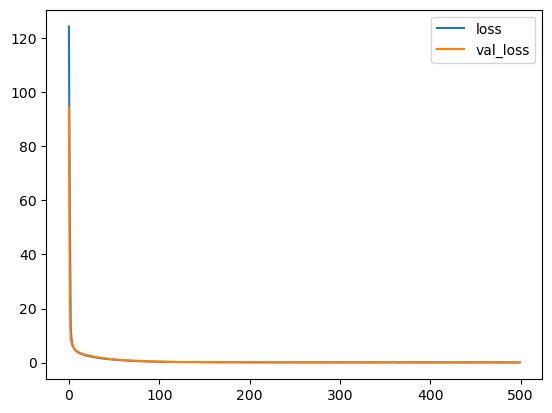

In [252]:
pd.DataFrame(history.history).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


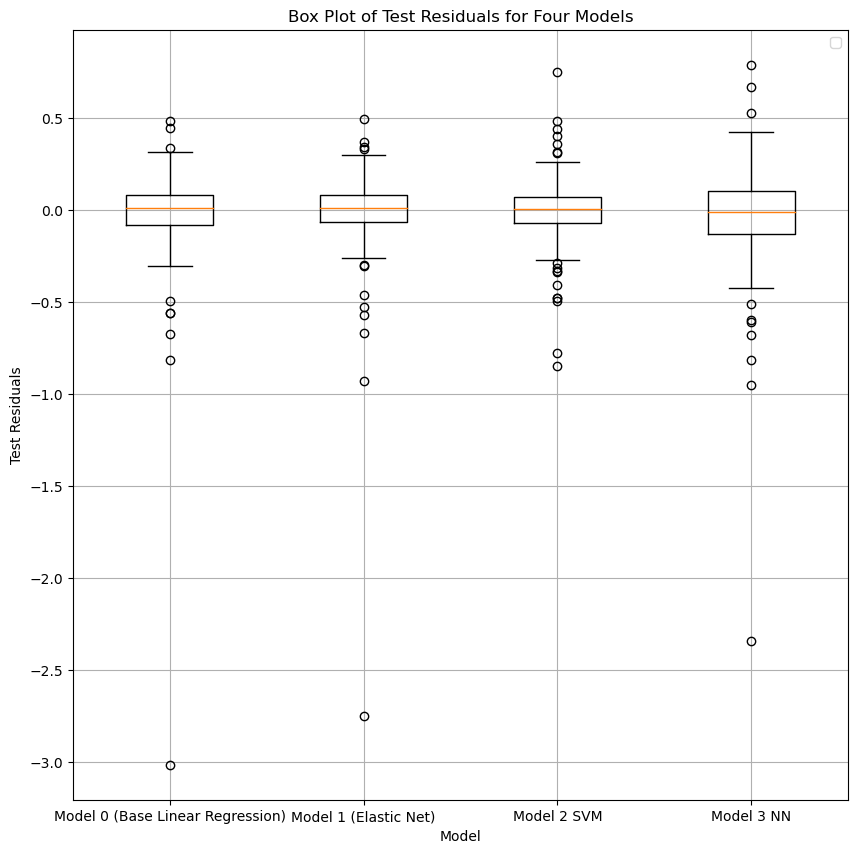

In [253]:
residuals_data = [residual_model0_test, residual_model1_test, residual_model2_test, residual_nn_test]


plt.figure(figsize=(10, 10))
plt.boxplot(residuals_data, labels=['Model 0 (Base Linear Regression)', 'Model 1 (Elastic Net)', 'Model 2 SVM', 'Model 3 NN'])
plt.xlabel('Model')
plt.ylabel('Test Residuals')
plt.title('Box Plot of Test Residuals for Four Models')
plt.grid(True)
plt.legend()
plt.show()

Order of best models in prediction accuracy based on residuals and test mse 

1. SVM 
2. Elastic Net / NN tied (as sometimes NN can have different accruacy each time trained sometimes it is below the test mse of Elastic net but does take around 1 min to compile so Elastic Net is the better option)
3. Base Regression. 